# Imports

In [1]:
from numpy.random import seed
seed(888)

In [2]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
tf.compat.v1.set_random_seed(404)

# Constants

In [5]:
LOG_DIR = 'L:/1MLproject/Section-10-Build Artifial Neural NW/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

IMG_WIDTH = 32
IMG_HEIGHT = 32
IMG_SIZE = IMG_WIDTH*IMG_HEIGHT
IMG_CHANNEL = 3
IMG_TOTAL_SIZE = IMG_SIZE*IMG_CHANNEL

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the data

In [6]:
(x_train_all,y_train_all),(x_test,y_test)=cifar10.load_data()

# Explore Data

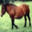

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

In [9]:
y_train_all[7].shape

(1,)

<function matplotlib.pyplot.show(close=None, block=None)>

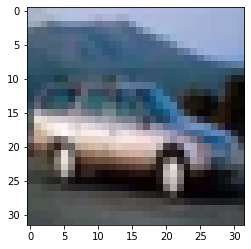

In [10]:
plt.imshow(x_train_all[4])
plt.show

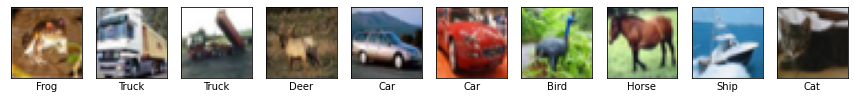

In [11]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]])
    plt.imshow(x_train_all[i])

In [12]:
nr_images, x, y, c = x_train_all.shape
print(nr_images,x,y,c)

50000 32 32 3


# Preprocess Data

In [13]:
type(x_train_all[0][0][0][0])
x_train_all[0][0][0]

array([59, 62, 63], dtype=uint8)

In [14]:
x_train_all,x_test = x_train_all/255.0, x_test/255.0
x_train_all[0][0][0][0]

0.23137254901960785

In [62]:
x_train_all = x_train_all.reshape(len(x_train_all),IMG_TOTAL_SIZE)
x_train_all.shape
x_test = x_test.reshape(len(x_test),IMG_TOTAL_SIZE)

In [16]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [17]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create small dataset(testing)

In [18]:
x_train_xs = x_train_all[:SMALL_TRAIN_SIZE]
y_train_xs = y_train_all[:SMALL_TRAIN_SIZE]

# Define Neural NW using Keras

In [44]:
# Model that doest have any overfitting preventing techniques
model_1 = Sequential([
    Dense(units=128,input_dim=IMG_TOTAL_SIZE,activation='relu',name='m1_hidden1'),
    Dense(units=64,activation='relu',name='m1_hidden2'),
    Dense(units=16,activation='relu',name='m1_hidden3'),
    Dense(units=10,activation='softmax',name='m1_output')
])

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Model uses Dropout technique to preventing overfitting
model_2 = Sequential()
model_2.add(Dropout(0.2,seed=42, input_shape=(IMG_TOTAL_SIZE,)))
model_2.add( Dense(units=128,activation='relu',name='m2_hidden1') )
model_2.add( Dense(units=64,activation='relu',name='m2_hidden2') )
model_2.add( Dense(units=16,activation='relu',name='m2_hidden3') )
model_2.add( Dense(units=10,activation='softmax',name='m2_output') )

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Model uses Dropout technique to preventing overfitting
model_3 = Sequential()
model_3.add(Dropout(0.2,seed=42, input_shape=(IMG_TOTAL_SIZE,)))
model_3.add( Dense(units=128,activation='relu',name='m3_hidden1') )
model_3.add(Dropout(0.25,seed=42))
model_3.add( Dense(units=64,activation='relu',name='m3_hidden2') )
model_3.add( Dense(units=16,activation='relu',name='m3_hidden3') )
model_3.add( Dense(units=10,activation='softmax',name='m3_output') )

model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Number of Param for each layer = Input_params x units(~Weights) + Bias(=units)
32*32*3*128 + 128

393344

In [25]:
(32*32*3*128 + 128) + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

# TensorBoard

In [26]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR,folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Success")

    return TensorBoard(log_dir=dir_paths)

In [27]:
samples_for_batch = 1000

start tensorboard : tensorboard --logdir=L:"\1MLproject\Section-10-Build Artifial Neural NW"

In [28]:
# Use Model 1 to train
nr_epochs = 150
model_1.fit(x_train_xs,y_train_xs, batch_size=samples_for_batch, epochs=nr_epochs ,
            callbacks=[get_tensorboard('Model 1')],verbose=0, validation_data=(x_val,y_val))

Success
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


In [59]:
# Use Model 1 to train all data
nr_epochs = 100
model_1.fit(x_train,y_train, batch_size=samples_for_batch, epochs=nr_epochs ,
            callbacks=[get_tensorboard('Model 1 all')],verbose=0, validation_data=(x_val,y_val))

Success


In [30]:
# Use Model 2 to train
nr_epochs = 150
model_2.fit(x_train_xs,y_train_xs, batch_size=samples_for_batch, epochs=nr_epochs ,
            callbacks=[get_tensorboard('Model 2')],verbose=0, validation_data=(x_val,y_val))

Success


In [83]:
# Use Model 2 to train all data
nr_epochs = 100
model_2.fit(x_train,y_train, batch_size=samples_for_batch, epochs=nr_epochs ,
            callbacks=[get_tensorboard('Model 2 all')],verbose=0, validation_data=(x_val,y_val))

Success


In [32]:
# Use Model 3 to train
nr_epochs = 300
model_3.fit(x_train_xs,y_train_xs, batch_size=samples_for_batch, epochs=nr_epochs ,
            callbacks=[get_tensorboard('Model 3')],verbose=0, validation_data=(x_val,y_val))

Success


In [33]:
# Use Model 3 to train all data
nr_epochs = 100
model_3.fit(x_train,y_train, batch_size=samples_for_batch, epochs=nr_epochs ,
            callbacks=[get_tensorboard('Model 3 all')],verbose=0, validation_data=(x_val,y_val))

Success


# Prediction on Individual Images

In [37]:
print(x_val.shape)
print(x_val[0].shape)

(10000, 3072)
(3072,)


In [43]:
test_1 = np.expand_dims(x_val[0],axis=0)
print(test_1.shape)
print(test_1)

(1, 3072)
[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]]


In [47]:
np.set_printoptions(precision=3)
model_2.predict(test_1)

array([[0.09 , 0.127, 0.135, 0.066, 0.137, 0.075, 0.078, 0.061, 0.119,
        0.113]], dtype=float32)

In [53]:
model_2.predict_classes(test_1)

array([4], dtype=int64)

In [52]:
np.argmax(model_2.predict(x_val), axis=-1)

array([4, 4, 2, ..., 2, 1, 2], dtype=int64)

In [55]:
print("Predicted Actual")
for i in range(10):
    test_1 = np.expand_dims(x_val[i],axis=0)
    print(model_2.predict_classes(test_1),y_val[i])

Predicted Actual
[4] [6]
[4] [9]
[2] [9]
[2] [4]
[2] [1]
[2] [1]
[2] [2]
[2] [7]
[2] [8]
[4] [3]


# Evaluation

In [60]:
model_1.metrics_names

['loss', 'accuracy']

In [65]:
test_loss, test_accuracy = model_1.evaluate(x_test,y_test)
print(f'Test Loss is {test_loss:0.3} and Test Accuracy is {test_accuracy:0.3}')

313/313 [==============================] - 0s 1ms/step - loss: 1.4586 - accuracy: 0.4968
Test Loss is 1.46 and Test Accuracy is 0.497


#### Confusion Matrix

In [84]:
predictions = model_1.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [85]:
conf_matrix.shape

(10, 10)

In [86]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [87]:
print(conf_matrix.max())
print(conf_matrix.min())

651
7


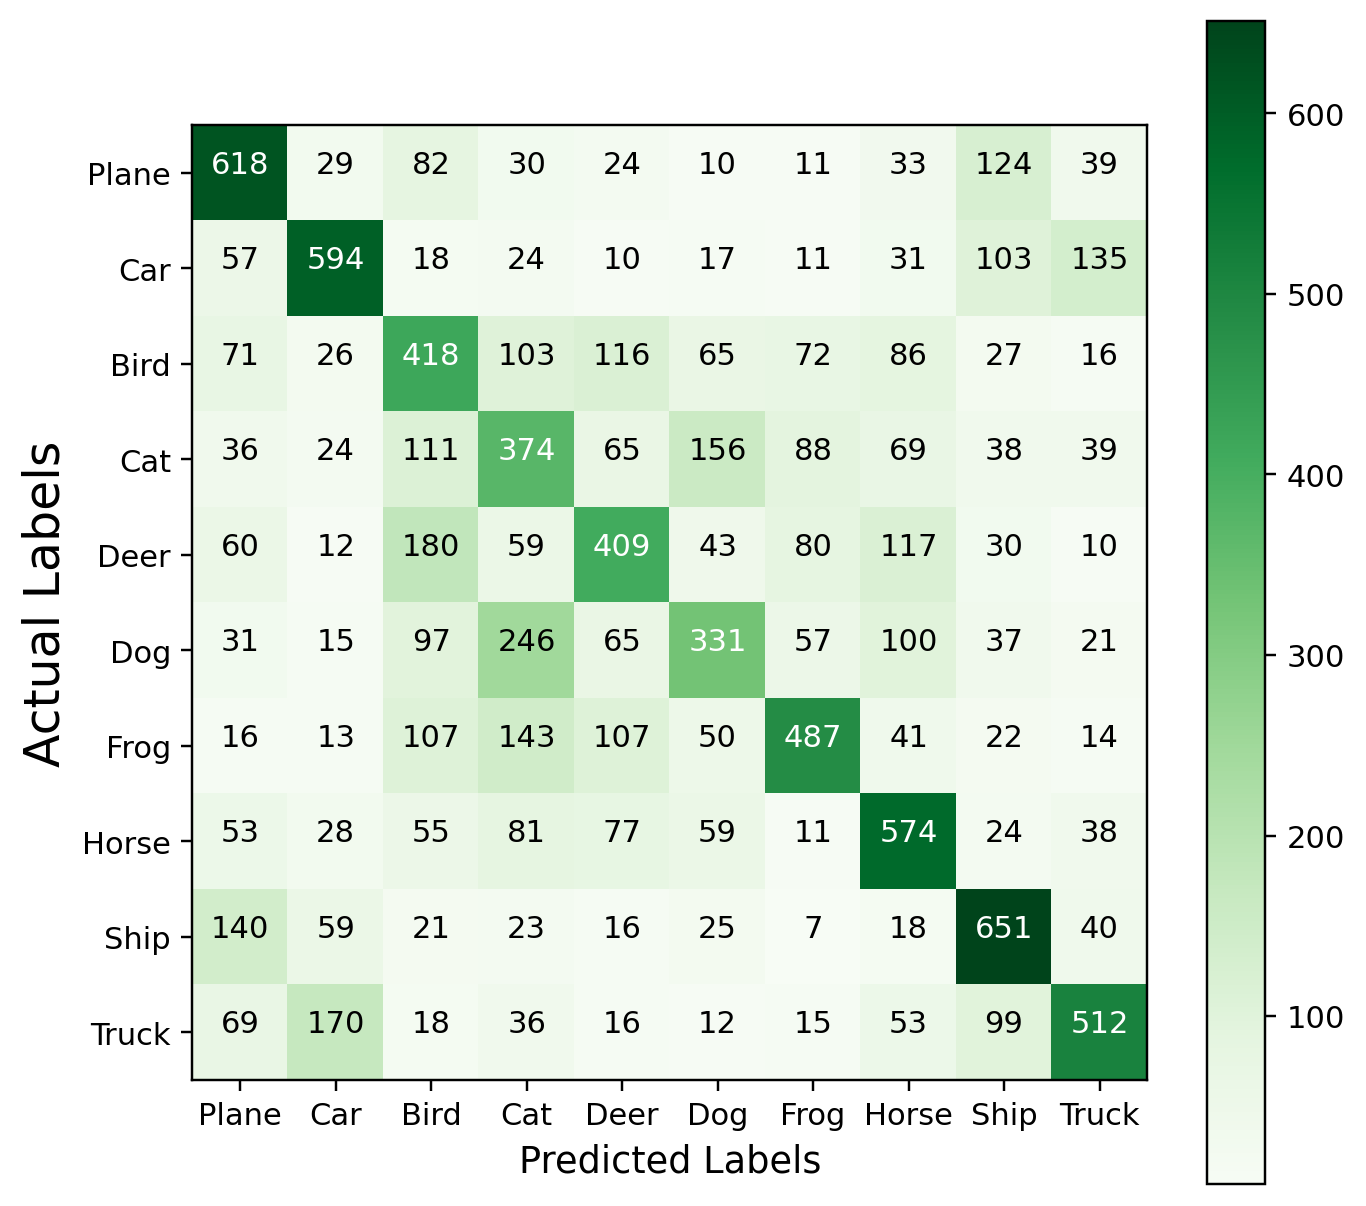

In [96]:
plt.figure(figsize=(7,7),dpi=220)
plt.imshow(conf_matrix,cmap=plt.cm.Greens)
plt.ylabel("Actual Labels",fontsize=16)
plt.xlabel("Predicted Labels",fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks,LABEL_NAMES)
plt.xticks(tick_marks,LABEL_NAMES)

plt.colorbar()

for i,j in itertools.product(range(nr_rows),range(nr_cols)):
    plt.text(j,i,conf_matrix[i,j], horizontalalignment='center',
             color='white' if conf_matrix[i,j]>conf_matrix.max()/2 else 'black')
    #  color='white' if conf_matrix[i,j]>conf_matrix.max()/2 else 'black' 
            
plt.show()

In [97]:
# True POsitives
np.diag(conf_matrix)

array([618, 594, 418, 374, 409, 331, 487, 574, 651, 512], dtype=int64)

In [99]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix,axis=1)
recall

array([0.618, 0.594, 0.418, 0.374, 0.409, 0.331, 0.487, 0.574, 0.651,
       0.512])

In [100]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix,axis=0)
precision

array([0.537, 0.612, 0.378, 0.334, 0.452, 0.431, 0.58 , 0.512, 0.564,
       0.593])

In [101]:
avg_recall = np.mean(recall)
avg_precision = np.mean(precision)
print(f'Model 1 recall score is {avg_recall:.2%}, precision is {avg_precision:.2%}')

Model 1 recall score is 49.68%, precision is 49.92%


In [103]:
f_score = 2 * (avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'Model 1 f score is {f_score:.2%}')

Model 1 f score is 49.80%
